In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
import numpy as np
from shapely.geometry import Point


In [2]:

data = pd.read_csv('data/nyc_census.csv', dtype={'GEOID20': str})
data.head()

,census,county,state,income,population,tract,GEOID20,OBJECTID_1,OBJECTID,ALAND20,...,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,HRS2020,RHRS20,Shape_Leng,Shape_Area,EQINTER20,area
0,92.02,Kings County,New York,827.0,3453.0,9202,36047009202,8876,10858,56624.0,...,40.644652,-73.998238,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.009992,0.000006,3,56625
1,94.01,Kings County,New York,484.0,2293.0,9401,36047009401,8901,10896,75483.0,...,40.644022,-74.002481,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.011616,0.000008,3,75483
2,94.02,Kings County,New York,631.0,2746.0,9402,36047009402,8875,10857,75543.0,...,40.642691,-74.000278,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.011615,0.000008,3,75544
3,96.00,Kings County,New York,1273.0,5858.0,9600,36047009600,8355,10264,150752.0,...,40.646015,-74.005785,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.016759,0.000016,3,150750
4,98.00,Kings County,New York,1247.0,6021.0,9800,36047009800,8356,10265,151006.0,...,40.643776,-74.008115,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.016761,0.000016,3,151005


In [3]:
data.columns

Index(['census', 'county', 'state', 'income', 'population', 'tract', 'GEOID20',
       'OBJECTID_1', 'OBJECTID', 'ALAND20', 'AWATER20', 'INTPTLAT20',
       'INTPTLON20', 'CBSA10', 'METRO_NAME', 'HRS2020', 'RHRS20', 'Shape_Leng',
       'Shape_Area', 'EQINTER20', 'area'],
      dtype='object')

In [4]:
neighborhoods = gpd.read_file('data/neighborhood.geojson')
neighborhoods.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.847,081,St. Albans,45401.316803,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,BX28,25666124.5948,005,Van Cortlandt Village,21945.719299,Bronx,2,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ..."
2,QN55,82461393.7368,081,South Ozone Park,36708.1693055,Queens,4,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ..."
3,BK50,82089678.6389,047,Canarsie,43703.6096661,Brooklyn,3,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."
4,BX41,14716710.7402,005,Mount Hope,18937.247819,Bronx,2,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ..."


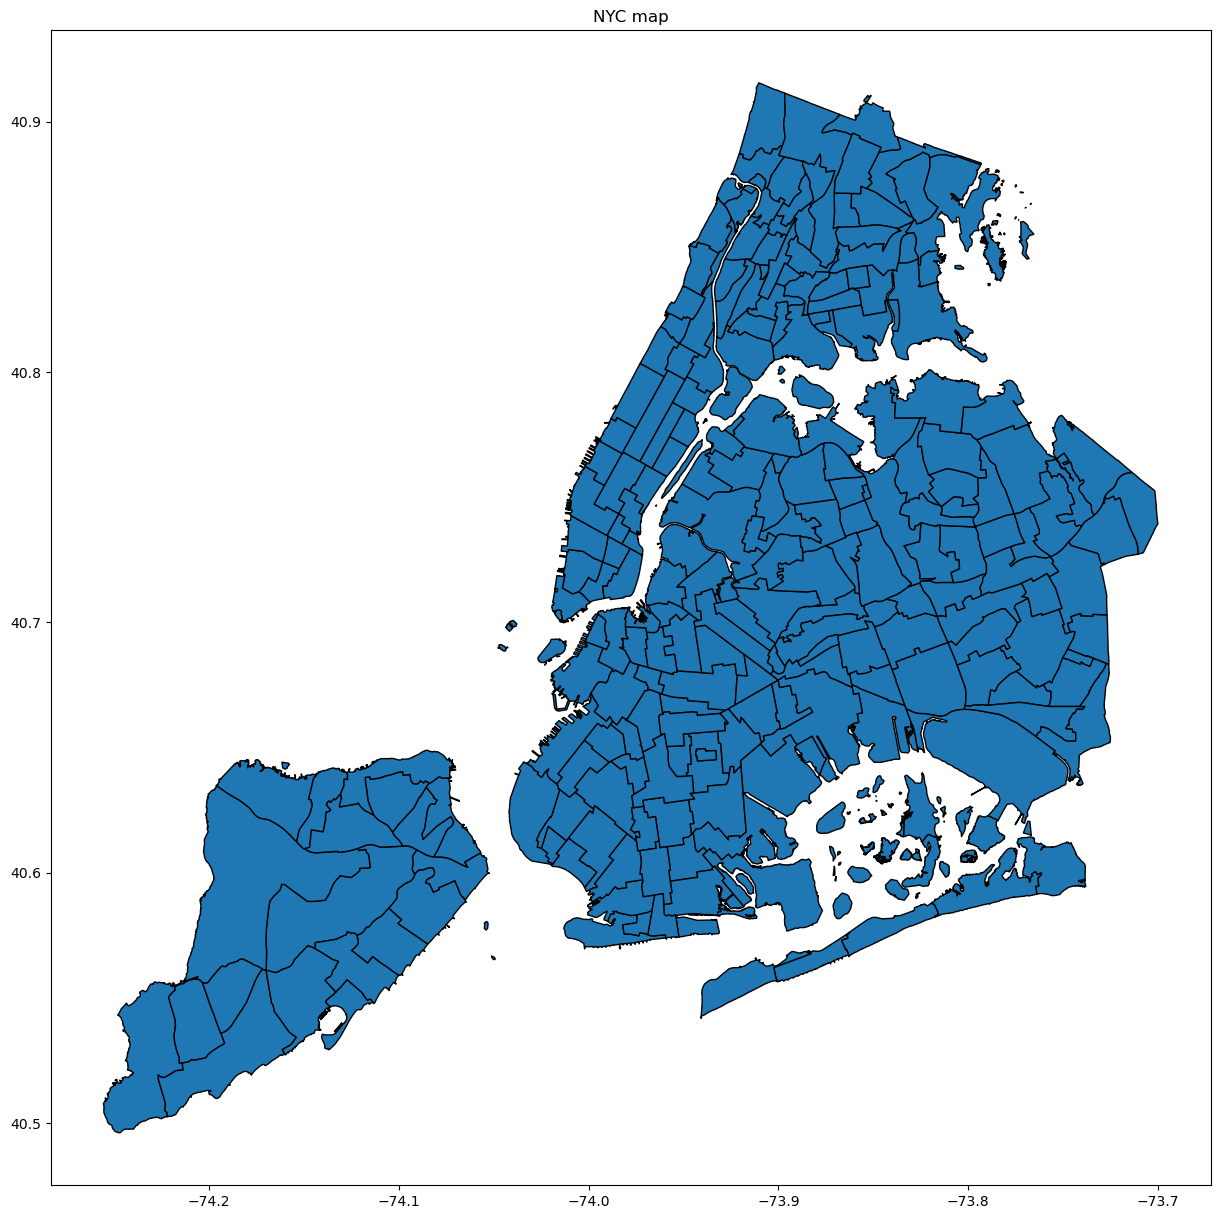

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, legend=True, edgecolor='black')
plt.title('NYC map')
plt.axis('on')
plt.show()


In [6]:
data['geometry'] = data.apply(lambda x: Point(float(x['INTPTLON20']), float(x['INTPTLAT20'])), axis=1)
data_gdf = gpd.GeoDataFrame(data, geometry='geometry')

In [7]:
merged_data = gpd.sjoin(neighborhoods, data_gdf, how='inner', op='intersects')

D:\Anaconda\envs\cusp7033\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_111920\434363479.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data = gpd.sjoin(neighborhoods, data_gdf, how='inner', op='intersects')


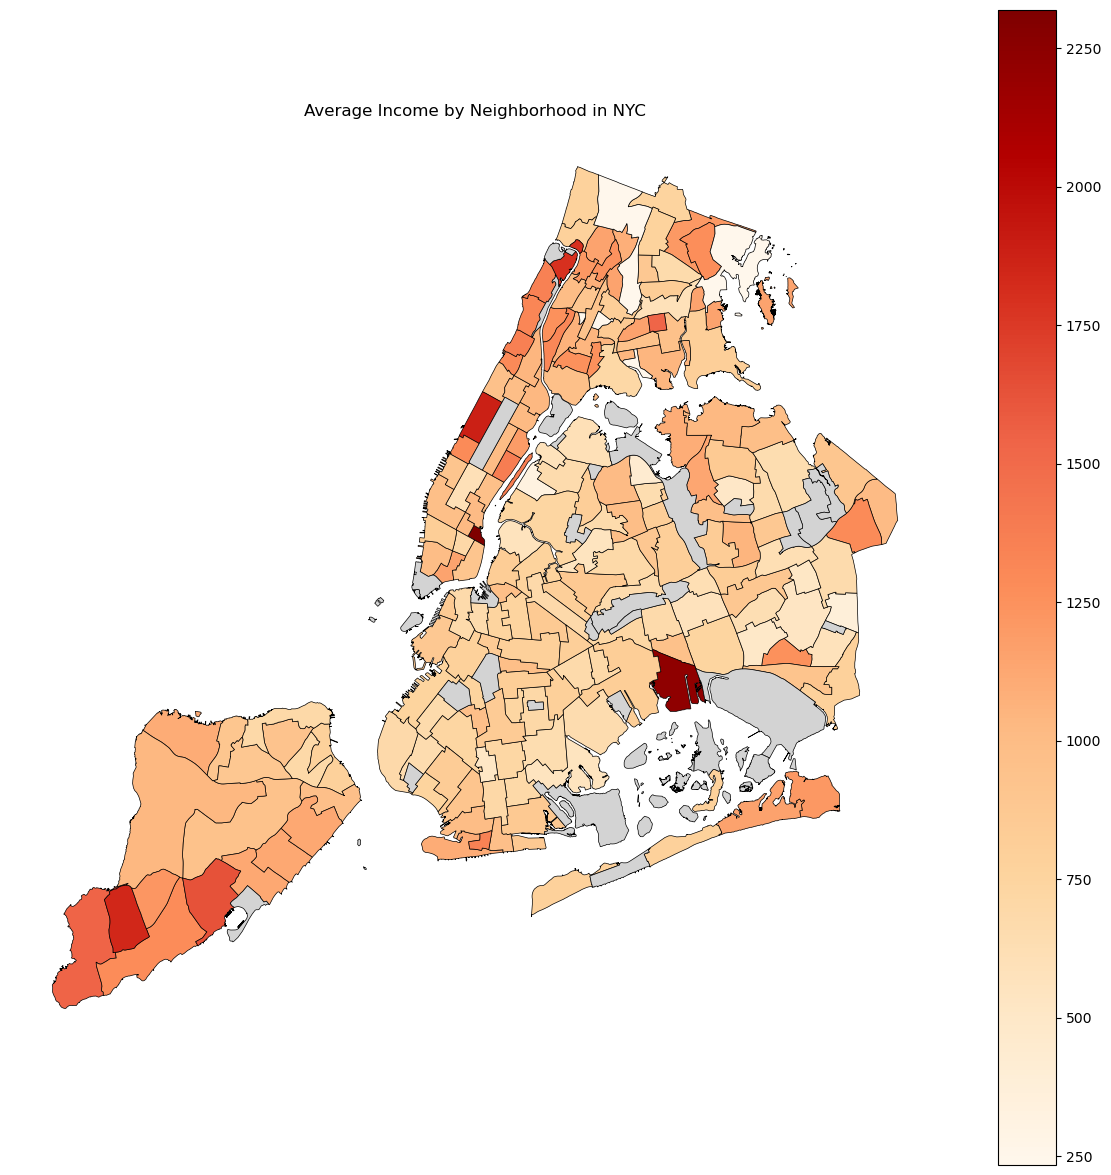

In [8]:
income = merged_data.groupby('ntacode')['income'].mean().reset_index()
neighborhoods = neighborhoods.merge(income, on='ntacode', how='left')
# neighborhoods['income'] = neighborhoods['income'].fillna(-1)
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='income', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Average Income by Neighborhood in NYC')
plt.axis('off')
plt.show()

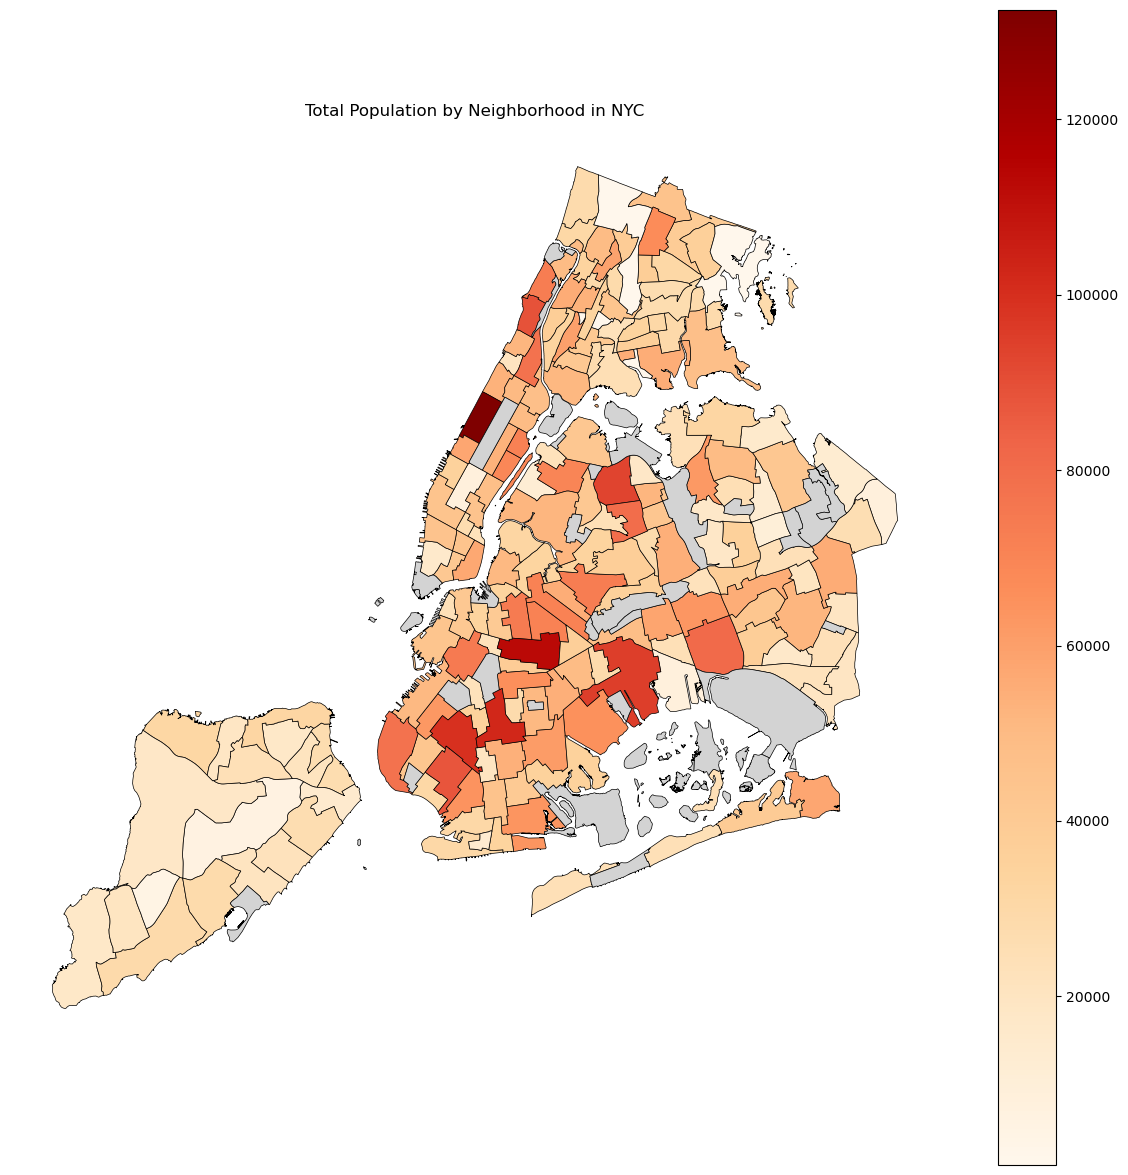

In [9]:
pop = merged_data.groupby('ntacode')['population'].sum().reset_index()
neighborhoods = neighborhoods.merge(pop, on='ntacode', how='left')
# neighborhoods['population'] = neighborhoods['population'].fillna(-1)

fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='population', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Population by Neighborhood in NYC')
plt.axis('off')
plt.show()


In [10]:
building = pd.read_csv('nyc_pluto_24v1_csv/pluto_24v1_1.csv', dtype={'bct2020':str, 'bctcb2020': str})
building

C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_111920\2667544196.py:1: DtypeWarning: Columns (21,22,24,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  building = pd.read_csv('nyc_pluto_24v1_csv/pluto_24v1_1.csv', dtype={'bct2020':str, 'bctcb2020': str})


,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,QN,798,31,401.0,4012301,40123012006,123.01,2006.0,30.0,22.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.775577,-73.900898,NaN
1,BK,6429,16,311.0,3017200,30172002004,172.00,2004.0,20.0,50.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.606009,-74.012389,NaN
2,BK,7790,42,318.0,3073200,30732001004,732.00,1004.0,22.0,45.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.627159,-73.934841,NaN
3,BK,7197,52,315.0,3037401,30374011000,374.01,2000.0,21.0,47.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.589133,-73.968723,NaN
4,QN,15318,35,414.0,4107201,41072011032,1072.01,1032.0,27.0,32.0,...,NaN,NaN,1,1.0,1.0,24v1.1,NaN,40.603476,-73.820367,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858567,SI,6850,104,503.0,5020804,50208042006,208.04,2006.0,31.0,51.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.540667,-74.198983,NaN
858568,SI,7916,20,503.0,5024401,50244011003,244.01,1002.0,31.0,51.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.507882,-74.247685,NaN
858569,SI,1252,10,501.0,5031902,50319023002,319.02,3003.0,31.0,49.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.637007,-74.164411,NaN
858570,QN,16103,75,414.0,4094202,40942022002,942.02,1010.0,27.0,31.0,...,NaN,NaN,1,1.0,1.0,24v1.1,t,40.590451,-73.809992,NaN


In [11]:
building.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

In [12]:
building['geometry'] = building.apply(lambda x: Point(float(x['longitude']), float(x['latitude'])), axis=1)
building_gdf = gpd.GeoDataFrame(building, geometry='geometry')
merged_data2 = gpd.sjoin(neighborhoods, building_gdf, how='inner', op='intersects')

D:\Anaconda\envs\cusp7033\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_111920\1715348646.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data2 = gpd.sjoin(neighborhoods, building_gdf, how='inner', op='intersects')


In [13]:
'''resarea = merged_data2.groupby('ntacode')['resarea'].sum().reset_index(name='resarea')
neighborhoods = neighborhoods.merge(resarea, on='ntacode', how='left')
neighborhoods['ln_resarea'] = np.log(neighborhoods['resarea'])
neighborhoods = neighborhoods.dropna(subset=['ln_resarea'])
neighborhoods = neighborhoods.loc[neighborhoods['ln_resarea'] >= 0]

fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='ln_resarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Resarea Area by Neighborhood in NYC')
plt.axis('off')
plt.show()'''

"resarea = merged_data2.groupby('ntacode')['resarea'].sum().reset_index(name='resarea')\nneighborhoods = neighborhoods.merge(resarea, on='ntacode', how='left')\nneighborhoods['ln_resarea'] = np.log(neighborhoods['resarea'])\nneighborhoods = neighborhoods.dropna(subset=['ln_resarea'])\nneighborhoods = neighborhoods.loc[neighborhoods['ln_resarea'] >= 0]\n\nfig, ax = plt.subplots(figsize=(15, 15))\nneighborhoods.plot(ax=ax, column='ln_resarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})\nplt.title('Total Resarea Area by Neighborhood in NYC')\nplt.axis('off')\nplt.show()"

In [14]:
'''comarea = merged_data2.groupby('ntacode')['comarea'].sum().reset_index(name='comarea')
neighborhoods = neighborhoods.merge(comarea, on='ntacode', how='left')
neighborhoods['ln_comarea'] = np.log(neighborhoods['comarea'])
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='ln_comarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Comarea Area by Neighborhood in NYC')
plt.axis('off')
plt.show()'''

"comarea = merged_data2.groupby('ntacode')['comarea'].sum().reset_index(name='comarea')\nneighborhoods = neighborhoods.merge(comarea, on='ntacode', how='left')\nneighborhoods['ln_comarea'] = np.log(neighborhoods['comarea'])\nfig, ax = plt.subplots(figsize=(15, 15))\nneighborhoods.plot(ax=ax, column='ln_comarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})\nplt.title('Total Comarea Area by Neighborhood in NYC')\nplt.axis('off')\nplt.show()"

In [15]:
'''unitsres = merged_data2.groupby('ntacode')['unitsres'].sum().reset_index(name='unitsres')

neighborhoods = neighborhoods.merge(unitsres, on='ntacode', how='left')
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='unitsres', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Unitsres by Neighborhood in NYC')
plt.axis('off')
plt.show()'''

"unitsres = merged_data2.groupby('ntacode')['unitsres'].sum().reset_index(name='unitsres')\n\nneighborhoods = neighborhoods.merge(unitsres, on='ntacode', how='left')\nfig, ax = plt.subplots(figsize=(15, 15))\nneighborhoods.plot(ax=ax, column='unitsres', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})\nplt.title('Total Unitsres by Neighborhood in NYC')\nplt.axis('off')\nplt.show()"

In [16]:
for i in merged_data2.columns:
    print(i)

ntacode
shape_area
county_fips
ntaname
shape_leng
boro_name
boro_code
geometry
income
population
index_right
borough
block
lot
cd
bct2020
bctcb2020
ct2010
cb2010
schooldist
council
zipcode
firecomp
policeprct
healthcenterdistrict
healtharea
sanitboro
sanitdistrict
sanitsub
address
zonedist1
zonedist2
zonedist3
zonedist4
overlay1
overlay2
spdist1
spdist2
spdist3
ltdheight
splitzone
bldgclass
landuse
easements
ownertype
ownername
lotarea
bldgarea
comarea
resarea
officearea
retailarea
garagearea
strgearea
factryarea
otherarea
areasource
numbldgs
numfloors
unitsres
unitstotal
lotfront
lotdepth
bldgfront
bldgdepth
ext
proxcode
irrlotcode
lottype
bsmtcode
assessland
assesstot
exempttot
yearbuilt
yearalter1
yearalter2
histdist
landmark
builtfar
residfar
commfar
facilfar
borocode
bbl
condono
tract2010
xcoord
ycoord
zonemap
zmcode
sanborn
taxmap
edesignum
appbbl
appdate
plutomapid
firm07_flag
pfirm15_flag
version
dcpedited
latitude
longitude
notes


ownertype

In [17]:
for i in merged_data2['ownertype'].unique():
    temp = merged_data2[merged_data2['ownertype'] == i]
    ty = temp.groupby('ntacode')['ownertype'].count().reset_index(name=f'ownertype_{i}')
    neighborhoods = neighborhoods.merge(ty, on='ntacode', how='left')

type of area

In [18]:
areas = ['bldgarea','comarea','resarea','officearea','retailarea','garagearea','strgearea','factryarea','otherarea']
for i in areas:
    temp = merged_data2.groupby('ntacode')[i].sum().reset_index(name=i)
    neighborhoods = neighborhoods.merge(temp, on='ntacode', how='left')
    neighborhoods[f'ln_{i}'] = np.log(neighborhoods[i])

D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountere

building infor

In [19]:
building = ['numbldgs','numfloors','unitsres','unitstotal']
for i in building:
    temp = merged_data2.groupby('ntacode')[i].sum().reset_index(name=i)
    neighborhoods = neighborhoods.merge(temp, on='ntacode', how='left')
    neighborhoods[f'ln_{i}'] = np.log(neighborhoods[i])

D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
'''for i in merged_data2['bldgclass'].unique():
    temp = merged_data2[merged_data2['bldgclass'] == i]
    ty = temp.groupby('ntacode')['bldgclass'].count().reset_index(name=f'bldgclass_{i}')
    neighborhoods = neighborhoods.merge(ty, on='ntacode', how='left')'''

"for i in merged_data2['bldgclass'].unique():\n    temp = merged_data2[merged_data2['bldgclass'] == i]\n    ty = temp.groupby('ntacode')['bldgclass'].count().reset_index(name=f'bldgclass_{i}')\n    neighborhoods = neighborhoods.merge(ty, on='ntacode', how='left')"

value of land

In [21]:
temp = merged_data2.groupby('ntacode')['assessland'].mean().reset_index(name='average_assessland')
neighborhoods = neighborhoods.merge(temp, on='ntacode', how='left')

In [22]:
neighborhoods

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,income,population,...,ln_otherarea,numbldgs,ln_numbldgs,numfloors,ln_numfloors,unitsres,ln_unitsres,unitstotal,ln_unitstotal,average_assessland
0,QN08,77412747.847,081,St. Albans,45401.316803,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",535.181818,51850.0,...,14.049154,18996.0,9.851984,24933.27,10.123958,16462.0,9.708810,17269.0,9.756668,2.368346e+04
1,BX28,25666124.5948,005,Van Cortlandt Village,21945.719299,Bronx,2,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...",1148.200000,49289.0,...,15.125076,1500.0,7.313220,4057.75,8.308384,20412.0,9.923878,20875.0,9.946308,9.983020e+04
2,QN55,82461393.7368,081,South Ozone Park,36708.1693055,Queens,4,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...",740.600000,80824.0,...,14.556920,23708.0,10.073568,30440.48,10.323529,21666.0,9.983499,23426.0,10.061602,2.380073e+04
3,BK50,82089678.6389,047,Canarsie,43703.6096661,Brooklyn,3,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",655.160000,65526.0,...,15.295710,14385.0,9.573941,25042.09,10.128313,27220.0,10.211707,28674.0,10.263746,3.048665e+04
4,BX41,14716710.7402,005,Mount Hope,18937.247819,Bronx,2,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ...",899.307692,53255.0,...,14.060088,1351.0,7.208600,4567.67,8.426759,22307.0,10.012656,23192.0,10.051563,7.393109e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,BK93,11598952.595,047,Starrett City,17414.7826557,Brooklyn,3,"MULTIPOLYGON (((-73.88829 40.64672, -73.88829 ...",NaN,NaN,...,12.701190,150.0,5.010635,289.00,5.666427,7954.0,8.981430,8533.0,9.051696,7.588885e+05
191,BK73,28854355.6535,047,North Side-South Side,28099.9845081,Brooklyn,3,"MULTIPOLYGON (((-73.95814 40.72440, -73.95772 ...",829.250000,50869.0,...,14.119575,3500.0,8.160518,11086.75,9.313506,32029.0,10.374397,37181.0,10.523553,1.426140e+05
192,MN28,23300685.8847,061,Lower East Side,26879.1134206,Manhattan,1,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",917.307692,56968.0,...,15.253102,1222.0,7.108244,5521.75,8.616450,36691.0,10.510287,40512.0,10.609354,7.464312e+05
193,BK40,14041667.8647,047,Windsor Terrace,19033.6715536,Brooklyn,3,"MULTIPOLYGON (((-73.98017 40.66115, -73.98021 ...",761.375000,22741.0,...,13.946745,3111.0,8.042699,6295.00,8.747511,10599.0,9.268515,11143.0,9.318567,4.496984e+04


In [23]:
neighborhoods.to_csv('neighborhood.csv')